In [1]:
!pip install umap-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
import umap
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
# Cargar el dataset de Iris
iris = load_iris()
X = iris.data
y = iris.target
species = iris.target_names

#Diivisión de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Estandarizar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Proyección PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Proyección UMAP
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
X_umap = umap_model.fit_transform(X_scaled)

# Transformar el conjunto de prueba con el mismo modelo UMAP
X_test_umap = umap_model.transform(X_test_scaled)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


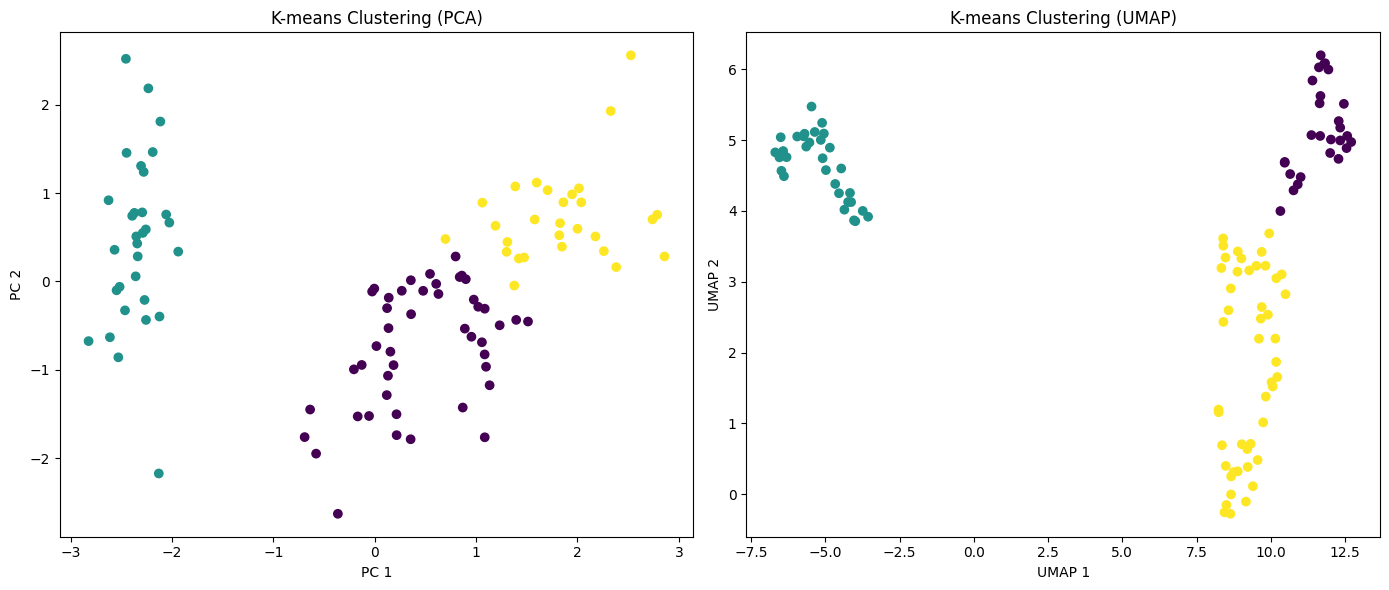

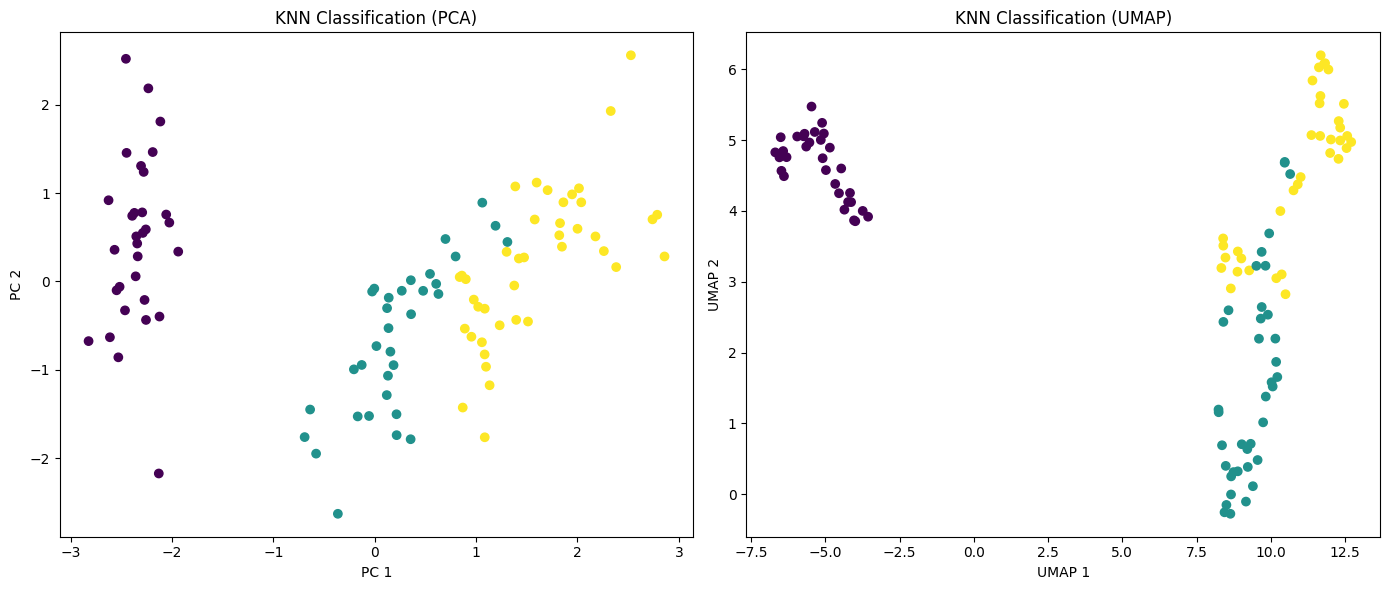

In [19]:
# K-means (no supervisado)
kmeans_pca = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_pca)
kmeans_umap = KMeans(n_clusters=3, random_state=42, n_init=10).fit(X_umap)
y_kmeans_pca = kmeans_pca.labels_
y_kmeans_umap = kmeans_umap.labels_


# ENTRENAR KNN CON PCA
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_pca, y_train)
y_pred_pca = knn_pca.predict(X_pca)


# ENTRENAR KNN CON UMAP
knn_umap = KNeighborsClassifier(n_neighbors=3)
knn_umap.fit(X_umap, y_train)
y_pred_umap = knn_umap.predict(X_umap)


# Gráficos para K-means en PCA y UMAP
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_pca.labels_, cmap='viridis')
plt.title('K-means Clustering (PCA)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

plt.subplot(1, 2, 2)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=kmeans_umap.labels_, cmap='viridis')
plt.title('K-means Clustering (UMAP)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.tight_layout()
plt.show()

# Gráficos para KNN clasificado con PCA y UMAP
plt.figure(figsize=(14, 6))

# PCA + KNN
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred_pca, cmap='viridis')
plt.title('KNN Classification (PCA)')
plt.xlabel('PC 1')
plt.ylabel('PC 2')

# UMAP + KNN
plt.subplot(1, 2, 2)
plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y_pred_umap, cmap='viridis')
plt.title('KNN Classification (UMAP)')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')

plt.tight_layout()
plt.show()


In [21]:
from sklearn.metrics import accuracy_score

# KNN entrenado solo con train PCA y UMAP
y_pred_test_pca = knn_pca.predict(X_test_pca)
y_pred_test_umap = knn_umap.predict(X_test_umap)

# Exactitud KNN
accuracy_pca = accuracy_score(y_test, y_pred_test_pca)
accuracy_umap = accuracy_score(y_test, y_pred_test_umap)
print(f"Precisión de KNN con PCA: {accuracy_pca:.4f}")
print(f"Precisión de KNN con UMAP: {accuracy_umap:.4f}")

Precisión de KNN con PCA: 0.9556
Precisión de KNN con UMAP: 0.9111
